### Build a DNN using Keras with `RELU` and `ADAM`

#### Load tensorflow

In [1]:
%tensorflow_version 2.x
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

TensorFlow 2.x selected.
2.1.0-rc1


#### Collect Fashion mnist data from tf.keras.datasets 

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len(test_labels)

10000

In [8]:
print("Dimention of an image in the dataset is ",train_images.shape[1:3])

Dimention of an image in the dataset is  (28, 28)


#### Change train and test labels into one-hot vectors

In [0]:
train_labels_encoded=tf.keras.utils.to_categorical(train_labels)

In [0]:
test_labels_encoded=tf.keras.utils.to_categorical(test_labels)

#### Build the Graph

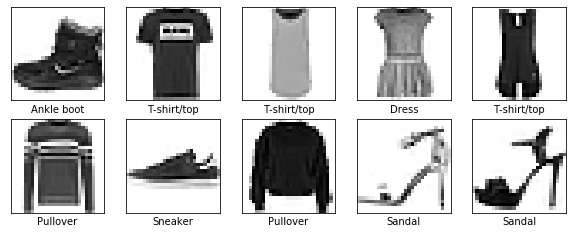

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

#### Initialize model, reshape & normalize data

In [0]:
# convert from integers to floats
train_images_norm = train_images.astype('float32')
test_images_norm = test_images.astype('float32')
# normalize to range 0-1
train_images_norm = train_images_norm / 255.0
test_images_norm = test_images_norm / 255.0
# return normalized images

In [0]:
from tensorflow.keras.backend import expand_dims
train_images_reshaped = train_images_norm.reshape((train_images_norm.shape[0], 28, 28, 1))
test_images_reshaped = test_images_norm.reshape((test_images_norm.shape[0], 28, 28, 1))

In [0]:
#using CNN
#Clear out tensorflow memory
tf.keras.backend.clear_session()

#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
#model.add(tf.keras.layers.Reshape((28,28,1),input_shape=(28,28,)))

In [0]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPool2D

#### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [0]:

#Flatten the output
model.add(Flatten())
#DNN
#Add Dense Layer
model.add(Dense(200))
model.add(Activation('relu'))

model.add(Dropout(0.25))

#Add Dense Layer
model.add(Dense(100))
model.add(Activation('relu'))



### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

In [0]:

#Add OUTPUT layer
model.add(Dense(10, activation='softmax'))


In [20]:
#Compile the model using Adam
adam=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

model.compile(optimizer=adam, loss="categorical_crossentropy", metrics=["accuracy"])

mckpt = tf.keras.callbacks.ModelCheckpoint('./mnist_v1.h5', 
                                           monitor='val_acc', save_best_only=True)
model.fit(train_images_reshaped,train_labels_encoded,          
          validation_data=(train_images_reshaped,train_labels_encoded),
          epochs=10,
          batch_size=32, callbacks=[mckpt])

Train on 60000 samples, validate on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 192s 3ms/sample - loss: 0.7590 - accuracy: 0.6988 - val_loss: 0.3574 - val_accuracy: 0.8730
Epoch 2/10
60000/60000 [==============================] - 185s 3ms/sample - loss: 0.3157 - accuracy: 0.8899 - val_loss: 0.2666 - val_accuracy: 0.9029
Epoch 3/10
60000/60000 [==============================] - 186s 3ms/sample - loss: 0.2432 - accuracy: 0.9151 - val_loss: 0.1821 - val_accuracy: 0.9366
Epoch 4/10
60000/60000 [==============================] - 188s 3ms/sample - loss: 0.1965 - accuracy: 0.9299 - val_loss: 0.1418 - val_accuracy: 0.9514
Epoch 5/10
60000/60000 [==============================] - 188s 3ms/sample - loss: 0.1662 - accuracy: 0.9410 - val_loss: 0.1281 - val_accuracy: 0.9560
Epoch 6/10
60000/60000 [==============================] - 189s 3ms/sample - loss: 0.1334 - accuracy: 0.9535 - val_loss: 0.0881 - val_accuracy: 0.9703
Epoch 7/10
60000/60000 [==========================

In [0]:
#Verify accuracy of the model

In [22]:
test_loss, test_acc = model.evaluate(test_images_reshaped,  test_labels_encoded, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 5s - loss: 0.3246 - accuracy: 0.9135

Test accuracy: 0.9135


In [0]:
#Verify performance of your model selectively

predictions = model.predict(train_images_reshaped)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(9), class_names, rotation=90)
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='blue')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

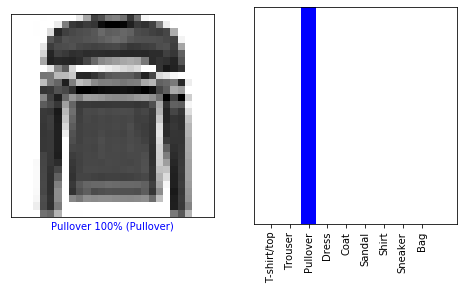

In [26]:
#Replace value of i with other index to check other product
i = 5
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_image(i, predictions[i], train_labels, train_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  train_labels)
plt.show()

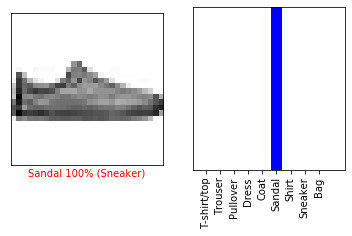

In [27]:
#checking for other values
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

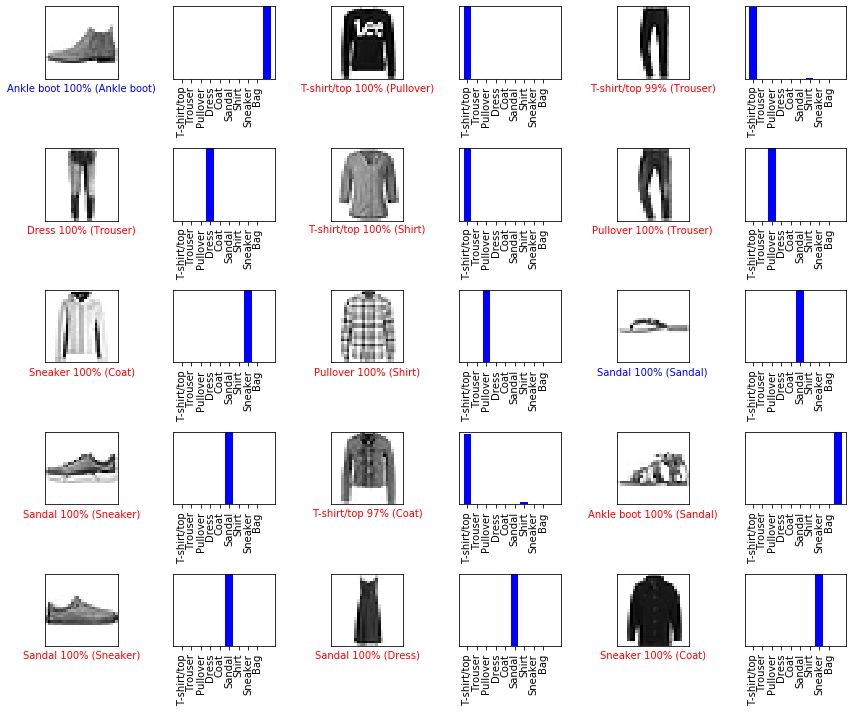

In [29]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()